# 1. Introduction
This notebook explains the analysis of ranking status (rank and percentile within SE lists) of Super Enhancers corresponding to specific genes in SE file datasets, a feature added in v1.2.0.  
It assumes knowledge of the basic [tutorial book](https://github.com/hamamoto-lab/SEgene/blob/main/SE_to_gene_links/notebooks/tutorial_book.ipynb).  
As sample data, we use [GSE156614](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE156614), the same dataset as in the basic tutorial book.  
Data organization follows the tutorial book conventions.

# 2. Import and Analysis Instance Preparation
We will prepare for analysis.

In [1]:
import SEgene_package.jupyter_wrapper
SEgeneJupyter = SEgene_package.jupyter_wrapper.SEgeneJupyter

In [2]:
test_segene = SEgeneJupyter(
    p2g_file="./data/GSE156614_tumor_2000000.tsv",     # Peak to Gene Links file
    rna_info_file="./data/GSE156614_rna_tumor.csv",    # RNA file
    rose_files_dir="./data/GSE156614_tumor_SE_table",  # Folder containing ROSE SE files
    FDR=0.05,                                          # False Discovery Rate
    r=0.5                                              # Correlation coefficient r
)

# 3. Checking P2GL Corresponding Gene Status
We check the link status on P2GL for the gene to be explored. In this case, we will explore *ADAP1*, which is highlighted in the SEgene paper (currently under submission).

In [3]:
test_segene.search_gene_enhancer_links("ADAP1")

Search gene: ADAP1
Location: chr7:897899-955407
TSS: 955407
Strand: -

FOUND 3 ENHANCERS LINKED TO GENE 'ADAP1':
--------------------------------------------------


,chr,Start,End,PeakID,symbol,FDR,r,distance(bp)
1,chr7,916535,916826,PeakID_683399,ADAP1,0.026061,0.556359,38727
2,chr7,918526,918693,PeakID_819271,ADAP1,0.045323,0.529036,36798
3,chr7,930090,930405,PeakID_448275,ADAP1,0.031849,0.546763,25160



GENOMIC COORDINATES FOR COPY/PASTE:
--------------------------------------------------
01: chr7:916535-916826
02: chr7:918526-918693
03: chr7:930090-930405


# 4. Exploration of SEs Based on Gene
Information about the *ADAP1* gene and a list of enhancers determined to correlate with it have appeared. Now, we will search for super enhancers that overlap with these enhancers from the dataset.

In [4]:
test_ADAP1=test_segene.find_gene_linked_super_enhancers_only('ADAP1')

**P2GL Search Results for gene: ADAP1**

Search gene: ADAP1
Location: chr7:897899-955407
TSS: 955407
Strand: -

FOUND 3 ENHANCERS LINKED TO GENE 'ADAP1':
--------------------------------------------------


,chrom,start,end,PeakID
1,chr7,916535,916826,PeakID_683399
2,chr7,918526,918693,PeakID_819271
3,chr7,930090,930405,PeakID_448275



GENOMIC COORDINATES FOR COPY/PASTE:
--------------------------------------------------
01: chr7:916535-916826
02: chr7:918526-918693
03: chr7:930090-930405


**Super Enhancer Search Results for gene: ADAP1**

,sample_name,REGION_ID,CHROM,START,STOP,NUM_LOCI,SIGNAL,enhancerRank,super_percentile
1,T45-H3K27ac_R1_peaks,6_T45-H3K27ac_R1_peak_65291_lociStitched,chr7,901015,950174,6,28640.0334,1016,38.20
2,T10-H3K27ac_R1_peaks,T10-H3K27ac_R1_peak_77153,chr7,909541,930100,1,46317.3711,382,80.65
3,T22-H3K27ac_R1_peaks,6_T22-H3K27ac_R1_peak_46452_lociStitched,chr7,913615,951544,6,39582.7044,150,78.57
4,T17-H3K27ac_R1_peaks,T17-H3K27ac_R1_peak_50069,chr7,917895,930047,1,28999.5328,579,50.68
5,T48-H3K27ac_R1_peaks,T48-H3K27ac_R1_peak_67262,chr7,907001,929980,1,46631.2847,323,83.12
...,...,...,...,...,...,...,...,...,...
60,T53-H3K27ac_R1_peaks,T53-H3K27ac_R1_peak_60275,chr7,908614,932453,1,34516.4881,602,61.41
61,T47-H3K27ac_R1_peaks,T47-H3K27ac_R1_peak_54299,chr7,906872,933385,1,143437.9813,38,97.67
62,T31-H3K27ac_R1_peaks,T31-H3K27ac_R1_peak_60583,chr7,909408,932453,1,28589.6270,710,53.50
63,T43-H3K27ac_R1_peaks,T43-H3K27ac_R1_peak_46403,chr7,911860,930052,1,55090.8336,170,84.63


# 5. Visualization of Search Results
Gene-linked SEs in each SE file were searched using the find_gene_linked_super_enhancers_only method. We will visualize these results. We will run it with settings to display the figure in the jupyter notebook while also saving a png file and detailed information in TSV format.
This operation displays the percentile distribution of the searched SEs in the SE list, and in how many samples they were found.

Histogram saved to ./output/ADAP1_histogram.png
Boxplot+swarm saved to ./output/ADAP1_boxswarm.png
Sample distribution pie chart saved to ./output/ADAP1_sample_pie.png
Quartiles for ADAP1 Super Enhancer Percentiles:
Q1 (25%): 52.95
Q2 (50%, Median): 75.92
Q3 (75%): 85.28
IQR: 32.33
Super enhancers percentile data saved to ./output/ADAP1_percentile_data.tsv


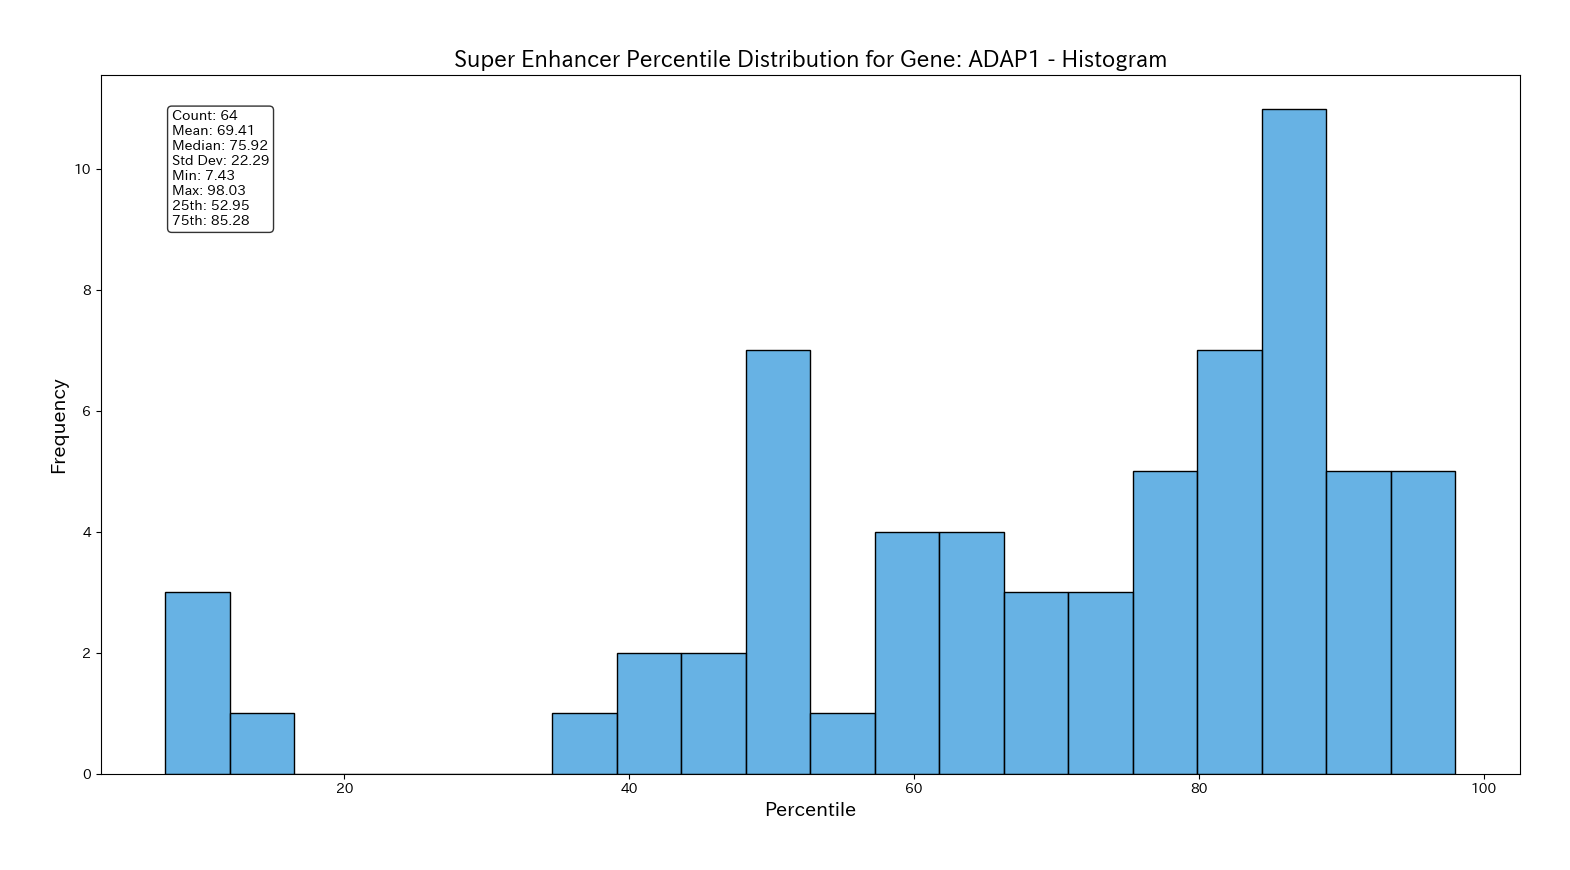

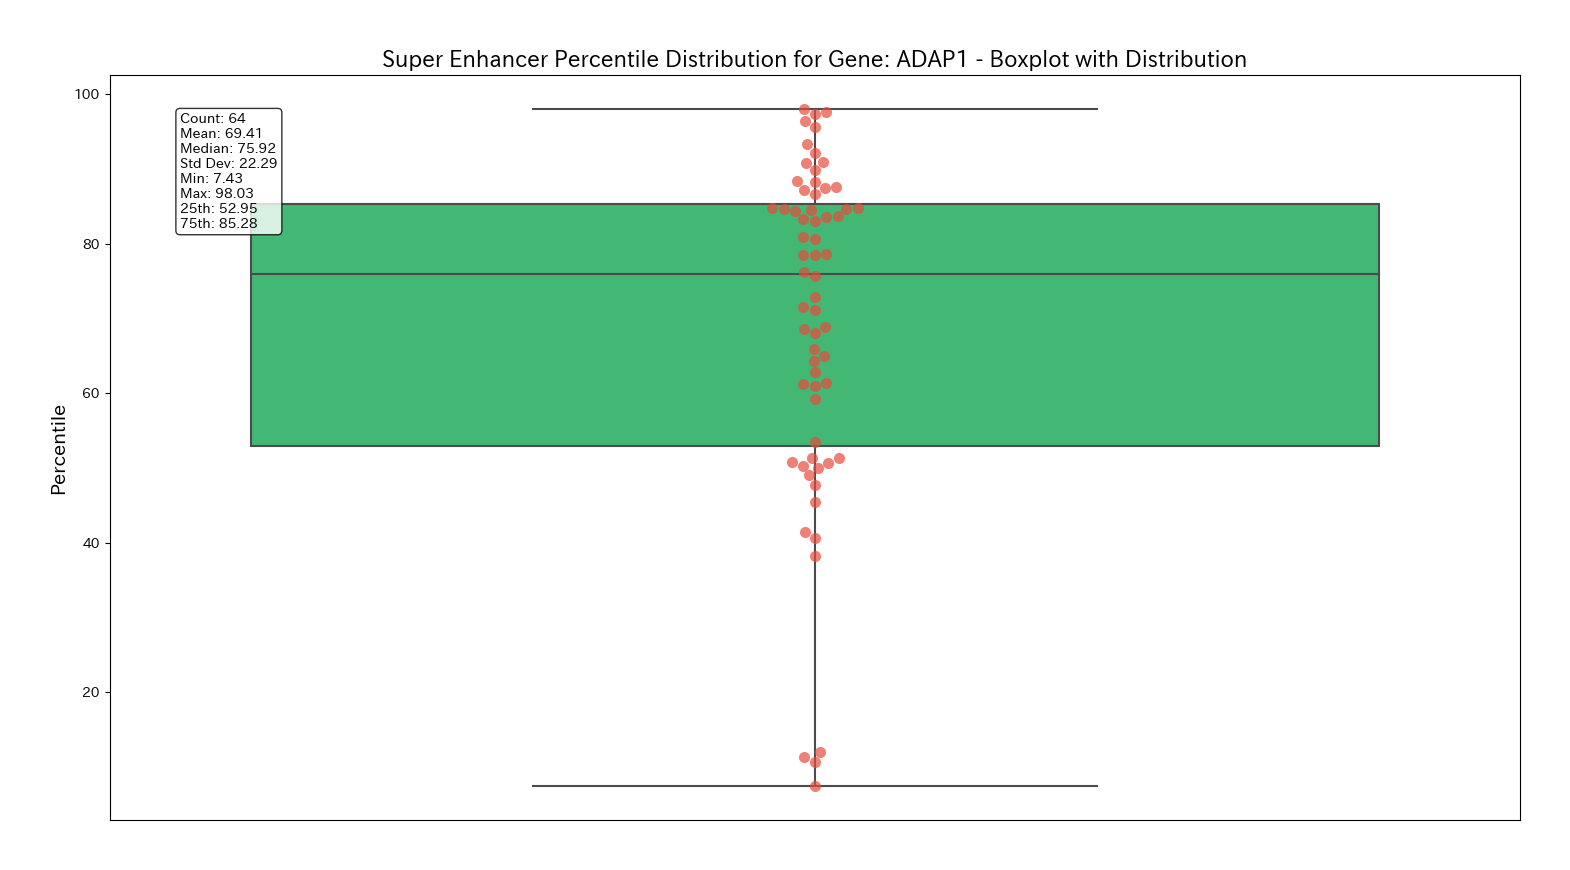

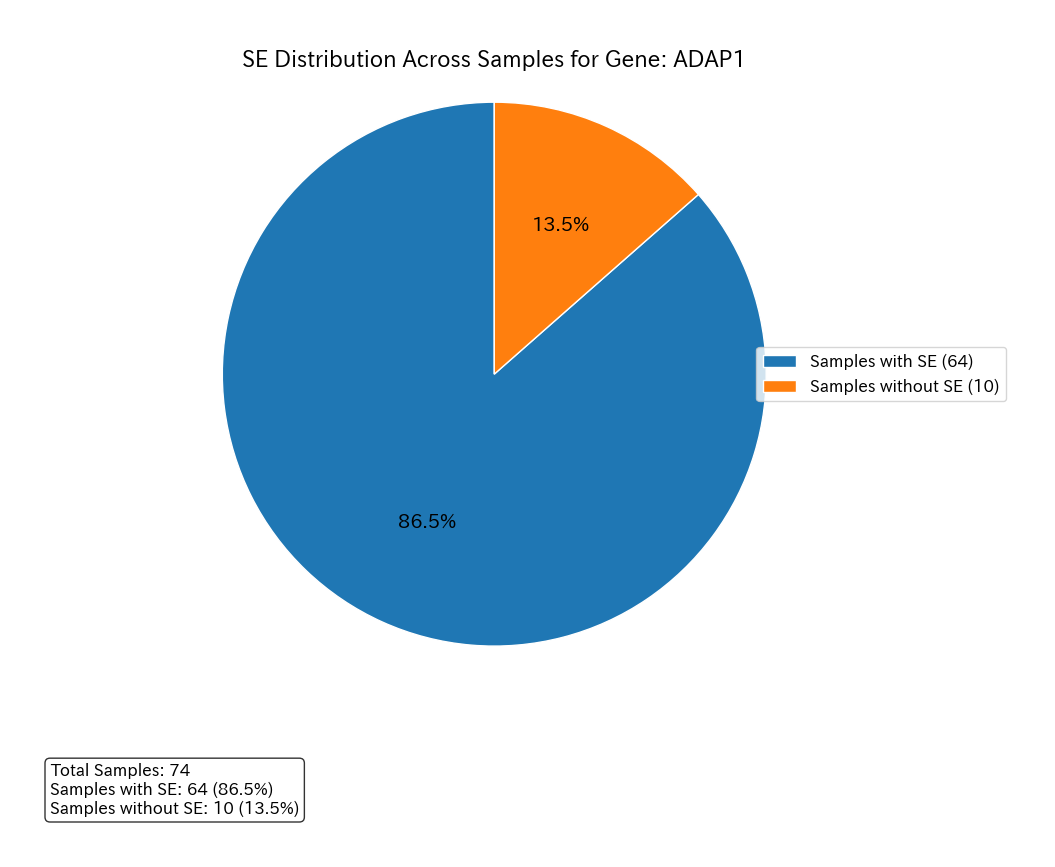

(<Figure size 1500x800 with 1 Axes>,
 <Figure size 1500x800 with 1 Axes>,
 <Figure size 1000x800 with 1 Axes>)

In [5]:
test_segene.plot_super_enhancers_overall_distribution( 
    save_fig=True,
    fig_format="png",
    save_data=True,
    data_format="tsv",
    output_dir="./output",
    output_prefix="ADAP1",
    show_plot=True  # Set to True if you want to display the figure interactively
)